In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# NHL Goalies and their Save Stats 

Datalink: https://www.kaggle.com/datasets/open-source-sports/professional-hockey-database

This dataset includes information on the measurable statistics in hockey starting in 1909 and ending in 2011. I will be exploring whether a goalie's height play a role in being a better puck stopper. I will be looking at the correlation between the physical attributes and the statistics of Save Percentage and Goals Against Average.

My working theory is that the bigger a goalie is, they cover more of the net so they can stop the puck more often.

## Tables Creation
Here I will be joining my master file to my goalie file and cleaning up all the data in the merged file that doesn't correspond to a goalie.

In [2]:
master = pd.read_csv('C:\\Users\\ajluc\\Documents\\Juno_Projects\\Python_Project\\CSV_Files\\Master.csv')
goalies = pd.read_csv('C:\\Users\\ajluc\\Documents\\Juno_Projects\\Python_Project\\CSV_Files\\Goalies.csv')

In [3]:
mergeDf = pd.merge(goalies,master, how='inner', on='playerID')
mergeDf.head()

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T_OL,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,...,8.0,Sweden,NaN,Umea,NaN,NaN,NaN,NaN,NaN,NaN
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,...,8.0,Sweden,NaN,Umea,NaN,NaN,NaN,NaN,NaN,NaN
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,...,8.0,Sweden,NaN,Umea,NaN,NaN,NaN,NaN,NaN,NaN
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,...,27.0,Canada,ON,Port Arthur,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# remove the unnecessary columns
colsdel = ['coachID', 'hofID', 'nameNote', 'nameGiven', 'nameNick', 'legendsID', 'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA',
       'birthYear', 'birthMon', 'birthDay', 'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry', 'birthState', 'pos',
       'deathState', 'deathCity','stint', 'lgID', 'PostGP', 'PostMin', 'PostW', 'PostL', 'PostT', 'PostENG', 'PostSHO', 'PostGA', 'PostSA']

df1 = mergeDf.drop(colsdel, axis=1)

In [5]:
df1.head(10)

,playerID,year,tmID,GP,Min,W,L,T_OL,ENG,SHO,GA,SA,firstName,lastName,height,weight,shootCatch,birthCountry
0,abbotge01,1943,BOS,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,George,Abbott,67.0,153.0,L,Canada
1,abrahch01,1974,NEW,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,Christer,Abrahamsson,72.0,180.0,L,Sweden
2,abrahch01,1975,NEW,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,Christer,Abrahamsson,72.0,180.0,L,Sweden
3,abrahch01,1976,NEW,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,Christer,Abrahamsson,72.0,180.0,L,Sweden
4,adamsjo02,1972,BOS,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,John,Adams,72.0,200.0,L,Canada
5,adamsjo02,1974,WAS,8.0,400.0,0.0,7.0,0.0,0.0,0.0,46.0,NaN,John,Adams,72.0,200.0,L,Canada
6,aebisda01,2000,COL,26.0,1393.0,12.0,7.0,3.0,3.0,3.0,52.0,538.0,David,Aebischer,73.0,185.0,L,Switzerland
7,aebisda01,2001,COL,21.0,1184.0,13.0,6.0,0.0,4.0,2.0,37.0,538.0,David,Aebischer,73.0,185.0,L,Switzerland
8,aebisda01,2002,COL,22.0,1235.0,7.0,12.0,0.0,4.0,1.0,50.0,593.0,David,Aebischer,73.0,185.0,L,Switzerland
9,aebisda01,2003,COL,62.0,3703.0,32.0,19.0,9.0,5.0,4.0,129.0,1703.0,David,Aebischer,73.0,185.0,L,Switzerland


In [6]:
# Add fullName column for readability
df1['playerName'] = df1['firstName'] + ' ' + df1['lastName']
df1.drop(['firstName','lastName'], axis=1, inplace=True) # get rid of unnecessary columns
df1.head()

,playerID,year,tmID,GP,Min,W,L,T_OL,ENG,SHO,GA,SA,height,weight,shootCatch,birthCountry,playerName
0,abbotge01,1943,BOS,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,67.0,153.0,L,Canada,George Abbott
1,abrahch01,1974,NEW,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,72.0,180.0,L,Sweden,Christer Abrahamsson
2,abrahch01,1975,NEW,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,72.0,180.0,L,Sweden,Christer Abrahamsson
3,abrahch01,1976,NEW,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,72.0,180.0,L,Sweden,Christer Abrahamsson
4,adamsjo02,1972,BOS,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,72.0,200.0,L,Canada,John Adams


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4278 entries, 0 to 4277
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      4278 non-null   object 
 1   year          4278 non-null   int64  
 2   tmID          4278 non-null   object 
 3   GP            4257 non-null   float64
 4   Min           4257 non-null   float64
 5   W             4257 non-null   float64
 6   L             4257 non-null   float64
 7   T_OL          4257 non-null   float64
 8   ENG           3533 non-null   float64
 9   SHO           4257 non-null   float64
 10  GA            4257 non-null   float64
 11  SA            2685 non-null   float64
 12  height        4235 non-null   float64
 13  weight        4235 non-null   float64
 14  shootCatch    4192 non-null   object 
 15  birthCountry  4222 non-null   object 
 16  playerName    4276 non-null   object 
dtypes: float64(11), int64(1), object(5)
memory usage: 601.6+ KB


## Cleaning Data

If there are not any values in the column catches, GA, SA, then they will be removed from the dataset. Also, only goalies that have played sixty minutes or more will be included as sixty minutes is a game played.

Here we are summing all of our goalie stats per goalie and not broken down per year, so that way we can look at all total stats.

In [8]:
df2 = df1.groupby('playerID')[['GP','Min','W','L','T_OL','ENG','SHO','GA','SA']].sum()
df2

,GP,Min,W,L,T_OL,ENG,SHO,GA,SA
playerID,,,,,,,,,
abbotge01,1.0,60.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
abrahch01,102.0,5739.0,41.0,46.0,7.0,1.0,3.0,342.0,3163.0
adamsjo02,22.0,1180.0,9.0,10.0,1.0,0.0,1.0,85.0,0.0
aebisda01,214.0,12230.0,106.0,74.0,17.0,23.0,13.0,513.0,5807.0
aikendo01,1.0,34.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...
youngdo01,1.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
youngwe01,187.0,9410.0,59.0,86.0,12.0,16.0,2.0,618.0,4977.0
zabama01,1.0,34.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0


Time to merge our goalie stats back to the full dataset to get their physical attributes back

In [9]:
df = pd.merge(left=df2, right=df1.loc[:,['playerID','playerName','height','weight','shootCatch','birthCountry']],how='left',left_index=True, right_on='playerID').drop_duplicates()
# drop duplicates as each goalie will have mutiple identical entries

In [10]:
df

,GP,Min,W,L,T_OL,ENG,SHO,GA,SA,playerID,playerName,height,weight,shootCatch,birthCountry
0,1.0,60.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,abbotge01,George Abbott,67.0,153.0,L,Canada
1,102.0,5739.0,41.0,46.0,7.0,1.0,3.0,342.0,3163.0,abrahch01,Christer Abrahamsson,72.0,180.0,L,Sweden
4,22.0,1180.0,9.0,10.0,1.0,0.0,1.0,85.0,0.0,adamsjo02,John Adams,72.0,200.0,L,Canada
6,214.0,12230.0,106.0,74.0,17.0,23.0,13.0,513.0,5807.0,aebisda01,David Aebischer,73.0,185.0,L,Switzerland
14,1.0,34.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,aikendo01,Don Aiken,71.0,165.0,L,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,1.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,youngdo01,Doug Young,70.0,190.0,R,Canada
4264,187.0,9410.0,59.0,86.0,12.0,16.0,2.0,618.0,4977.0,youngwe01,Wendell Young,69.0,181.0,L,Canada
4274,1.0,34.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,zabama01,Matt Zaba,73.0,190.0,L,Canada
4275,3.0,185.0,1.0,1.0,1.0,0.0,0.0,12.0,100.0,zaniemi01,Mike Zanier,71.0,183.0,L,Canada


Only if they played more than 60 minutes will I keep them as 60 minutes is the amount of a full hockey game. This gives a more accurate representation of their skills as it is hard to judge someone on less than a full game played.

In [11]:
df = df.loc[df['Min'] > 60]

In [12]:
df

,GP,Min,W,L,T_OL,ENG,SHO,GA,SA,playerID,playerName,height,weight,shootCatch,birthCountry
1,102.0,5739.0,41.0,46.0,7.0,1.0,3.0,342.0,3163.0,abrahch01,Christer Abrahamsson,72.0,180.0,L,Sweden
4,22.0,1180.0,9.0,10.0,1.0,0.0,1.0,85.0,0.0,adamsjo02,John Adams,72.0,200.0,L,Canada
6,214.0,12230.0,106.0,74.0,17.0,23.0,13.0,513.0,5807.0,aebisda01,David Aebischer,73.0,185.0,L,Switzerland
15,106.0,6570.0,47.0,43.0,16.0,0.0,11.0,257.0,0.0,aitkean01,Andy Aitkenhead,69.0,145.0,L,Scotland
19,3.0,180.0,0.0,2.0,1.0,0.0,0.0,13.0,0.0,almasre01,Red Almas,69.0,160.0,R,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,4.0,212.0,0.0,4.0,0.0,0.0,0.0,16.0,104.0,yeremvi01,Vitali Yeremeyev,70.0,167.0,L,Kazakhstan
4262,11.0,417.0,3.0,2.0,0.0,2.0,0.0,16.0,199.0,yorkal01,Allen York,76.0,190.0,NaN,NaN
4264,187.0,9410.0,59.0,86.0,12.0,16.0,2.0,618.0,4977.0,youngwe01,Wendell Young,69.0,181.0,L,Canada
4275,3.0,185.0,1.0,1.0,1.0,0.0,0.0,12.0,100.0,zaniemi01,Mike Zanier,71.0,183.0,L,Canada


In [13]:
df.isna().sum()

GP               0
Min              0
W                0
L                0
T_OL             0
ENG              0
SHO              0
GA               0
SA               0
playerID         0
playerName       2
height          22
weight          22
shootCatch      44
birthCountry    29
dtype: int64

Need to get rid of the null values in the columns that I will be looking at further for my analysis.

In [14]:
df = df.dropna(axis=0, subset=['height','shootCatch','weight'])
df

,GP,Min,W,L,T_OL,ENG,SHO,GA,SA,playerID,playerName,height,weight,shootCatch,birthCountry
1,102.0,5739.0,41.0,46.0,7.0,1.0,3.0,342.0,3163.0,abrahch01,Christer Abrahamsson,72.0,180.0,L,Sweden
4,22.0,1180.0,9.0,10.0,1.0,0.0,1.0,85.0,0.0,adamsjo02,John Adams,72.0,200.0,L,Canada
6,214.0,12230.0,106.0,74.0,17.0,23.0,13.0,513.0,5807.0,aebisda01,David Aebischer,73.0,185.0,L,Switzerland
15,106.0,6570.0,47.0,43.0,16.0,0.0,11.0,257.0,0.0,aitkean01,Andy Aitkenhead,69.0,145.0,L,Scotland
19,3.0,180.0,0.0,2.0,1.0,0.0,0.0,13.0,0.0,almasre01,Red Almas,69.0,160.0,R,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,5.0,258.0,1.0,3.0,0.0,0.0,0.0,13.0,141.0,yeatsma01,Matthew Yeats,71.0,165.0,L,Canada
4261,4.0,212.0,0.0,4.0,0.0,0.0,0.0,16.0,104.0,yeremvi01,Vitali Yeremeyev,70.0,167.0,L,Kazakhstan
4264,187.0,9410.0,59.0,86.0,12.0,16.0,2.0,618.0,4977.0,youngwe01,Wendell Young,69.0,181.0,L,Canada
4275,3.0,185.0,1.0,1.0,1.0,0.0,0.0,12.0,100.0,zaniemi01,Mike Zanier,71.0,183.0,L,Canada


In [15]:
# make sure there are no more nulls
df.isna().sum()

GP              0
Min             0
W               0
L               0
T_OL            0
ENG             0
SHO             0
GA              0
SA              0
playerID        0
playerName      0
height          0
weight          0
shootCatch      0
birthCountry    1
dtype: int64

In [16]:
# rename some columns so that way they are more readable
df = df.rename({'shootCatch':'Catches', 'W':'Wins', 'L':"Loses"}, axis=1)

### Adding Goalie stats
Time to start calculating the stats that I need but are not present in my dataset

First up is adding a saves column. We need this metric for further calculations.

In [17]:
df = df.assign(Svs = df['SA'] - df['GA'])
df = df.loc[df['Svs'] > 0] # a goalie need to have made a save to be considered

In [18]:
df

,GP,Min,Wins,Loses,T_OL,ENG,SHO,GA,SA,playerID,playerName,height,weight,Catches,birthCountry,Svs
1,102.0,5739.0,41.0,46.0,7.0,1.0,3.0,342.0,3163.0,abrahch01,Christer Abrahamsson,72.0,180.0,L,Sweden,2821.0
6,214.0,12230.0,106.0,74.0,17.0,23.0,13.0,513.0,5807.0,aebisda01,David Aebischer,73.0,185.0,L,Switzerland,5294.0
22,294.0,16408.0,131.0,110.0,30.0,20.0,19.0,764.0,8808.0,andercr01,Craig Anderson,74.0,180.0,L,USA,8044.0
33,11.0,523.0,2.0,7.0,0.0,0.0,0.0,44.0,305.0,archayv01,Yves Archambault,71.0,170.0,L,Canada,261.0
35,7.0,273.0,0.0,1.0,2.0,2.0,0.0,12.0,113.0,askeyto01,Tom Askey,73.0,195.0,L,USA,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,5.0,258.0,1.0,3.0,0.0,0.0,0.0,13.0,141.0,yeatsma01,Matthew Yeats,71.0,165.0,L,Canada,128.0
4261,4.0,212.0,0.0,4.0,0.0,0.0,0.0,16.0,104.0,yeremvi01,Vitali Yeremeyev,70.0,167.0,L,Kazakhstan,88.0
4264,187.0,9410.0,59.0,86.0,12.0,16.0,2.0,618.0,4977.0,youngwe01,Wendell Young,69.0,181.0,L,Canada,4359.0
4275,3.0,185.0,1.0,1.0,1.0,0.0,0.0,12.0,100.0,zaniemi01,Mike Zanier,71.0,183.0,L,Canada,88.0


Now we have all the needed stats to calculate Goals Against Average and their Save Percentage. 
 - **Goals Against Average:** is calculated by taking the goals against (GA) multiplying by 60 (minutes in a game) and dividing that by Minutes played which tells us for a game how many goals are going to be scored against
 - **Save Percentage:** is calculated by taking the shots against (SA) minus goals against (GA) which gives us how many save a goalie has made

In [19]:
df = df.assign(GAA = round(((df['GA'] * 60) / df['Min']), 2))
df = df.assign(Svp = round((df['Svs'] / df['SA']) , 3))
df.rename({'Svp':'Sv%'}, axis=1, inplace=True)

Reorder the columns to a more traditional layout

In [20]:
df = df[['playerID','playerName','height','weight','Catches','birthCountry','GP','Wins','Loses','T_OL','SA','Svs','GA','Sv%','GAA','Min','SHO','ENG']]

In [21]:
df

,playerID,playerName,height,weight,Catches,birthCountry,GP,Wins,Loses,T_OL,SA,Svs,GA,Sv%,GAA,Min,SHO,ENG
1,abrahch01,Christer Abrahamsson,72.0,180.0,L,Sweden,102.0,41.0,46.0,7.0,3163.0,2821.0,342.0,0.892,3.58,5739.0,3.0,1.0
6,aebisda01,David Aebischer,73.0,185.0,L,Switzerland,214.0,106.0,74.0,17.0,5807.0,5294.0,513.0,0.912,2.52,12230.0,13.0,23.0
22,andercr01,Craig Anderson,74.0,180.0,L,USA,294.0,131.0,110.0,30.0,8808.0,8044.0,764.0,0.913,2.79,16408.0,19.0,20.0
33,archayv01,Yves Archambault,71.0,170.0,L,Canada,11.0,2.0,7.0,0.0,305.0,261.0,44.0,0.856,5.05,523.0,0.0,0.0
35,askeyto01,Tom Askey,73.0,195.0,L,USA,7.0,0.0,1.0,2.0,113.0,101.0,12.0,0.894,2.64,273.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,yeatsma01,Matthew Yeats,71.0,165.0,L,Canada,5.0,1.0,3.0,0.0,141.0,128.0,13.0,0.908,3.02,258.0,0.0,0.0
4261,yeremvi01,Vitali Yeremeyev,70.0,167.0,L,Kazakhstan,4.0,0.0,4.0,0.0,104.0,88.0,16.0,0.846,4.53,212.0,0.0,0.0
4264,youngwe01,Wendell Young,69.0,181.0,L,Canada,187.0,59.0,86.0,12.0,4977.0,4359.0,618.0,0.876,3.94,9410.0,2.0,16.0
4275,zaniemi01,Mike Zanier,71.0,183.0,L,Canada,3.0,1.0,1.0,1.0,100.0,88.0,12.0,0.880,3.89,185.0,0.0,0.0


## Get a sense of the Data
#### Find out if the height of goalies has increased over the years
Here I am looking at the height of the goalies and whether their height has increased over the years. I expect to find that back in the start of hockey goalies used to be smaller as they didn't have as much padding so they needed to be more nimble in getting the padding they did have between themselves and the puck.

I am using my uncleaned dataset here to include all of the years and get a sense of if goalies have grown in size. 

<AxesSubplot:xlabel='year', ylabel='height'>

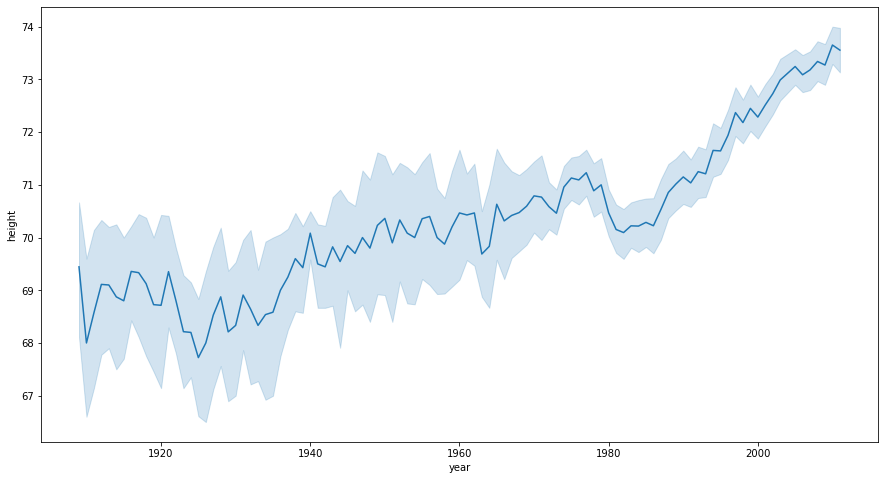

In [22]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df1, x='year', y='height')

From here we can see that goalies started smaller on average, then after a large dip in height around 1921, their size slowly climbs until about 1981 when it dips down again and then has a constant growth since then.

I am now using my cleaned dataset as that is what I am going to use for the final analysis

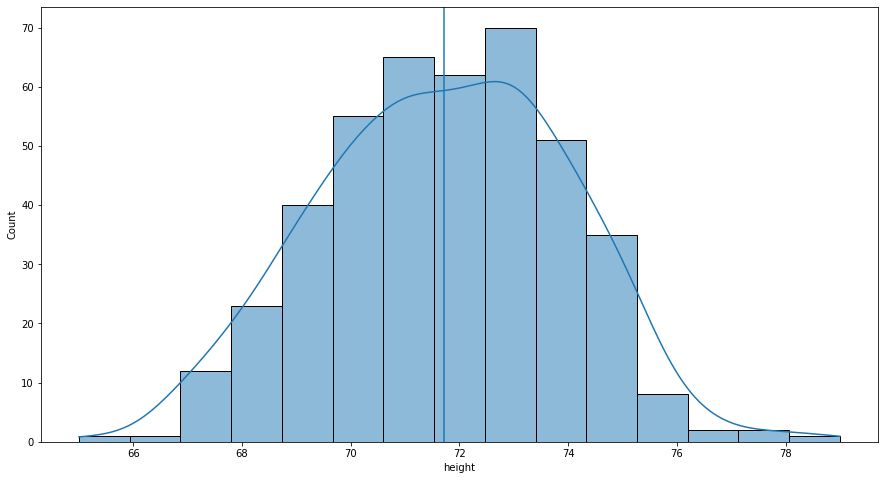

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(x='height', data=df, bins=15, kde=True)
plt.axvline(df['height'].mean())

In [24]:
df['height'].mean()

71.71495327102804

There is an even distribution of the height of players. The median height of all goalies is 71.71 inches.

See who has the highest Save Percentage out of all goalies in the dataset

In [25]:
sortSvP = df.sort_values(['Sv%'], ascending=False)
sortSvP = sortSvP.reset_index() # create a ranking system that is why I reset the index
sortSvP.index = sortSvP.index + 1 # set it to +1 so that way the top ranked player would be number 1
sortSvP
sortSvP.head(10)

,index,playerID,playerName,height,weight,Catches,birthCountry,GP,Wins,Loses,T_OL,SA,Svs,GA,Sv%,GAA,Min,SHO,ENG
1,2036,khudoan01,Anton Khudobin,71.0,176.0,R,Kazakhstan,7.0,5.0,1.0,0.0,179.0,172.0,7.0,0.961,1.32,318.0,1.0,1.0
2,2117,lacosda01,Dan LaCosta,74.0,186.0,L,Canada,4.0,2.0,0.0,0.0,85.0,81.0,4.0,0.953,1.42,169.0,1.0,0.0
3,3493,shulmri01,Richard Shulmistra,74.0,185.0,R,Canada,2.0,1.0,1.0,0.0,51.0,48.0,3.0,0.941,1.48,122.0,0.0,0.0
4,3439,schneco01,Cory Schneider,74.0,195.0,L,USA,68.0,38.0,17.0,4.0,1880.0,1744.0,136.0,0.928,2.24,3639.0,4.0,2.0
5,3095,rasktu01,Tuukka Rask,74.0,171.0,L,Finland,102.0,47.0,35.0,11.0,2831.0,2622.0,209.0,0.926,2.20,5689.0,11.0,5.0
6,465,brodemi01,Mike Brodeur,74.0,190.0,L,Canada,7.0,3.0,1.0,0.0,129.0,119.0,10.0,0.922,2.17,277.0,1.0,0.0
7,1589,hasekdo01,Dominik Hasek,73.0,166.0,L,Czech Republic,735.0,389.0,223.0,95.0,20220.0,18648.0,1572.0,0.922,2.20,42837.0,81.0,32.0
8,3815,thomati01,Tim Thomas,71.0,201.0,L,USA,378.0,196.0,121.0,45.0,11432.0,10533.0,899.0,0.921,2.48,21785.0,31.0,27.0
9,3239,rinnepe01,Pekka Rinne,77.0,207.0,L,Finland,250.0,138.0,72.0,26.0,7082.0,6522.0,560.0,0.921,2.35,14295.0,25.0,20.0
10,2376,lundqhe01,Henrik Lundqvist,73.0,195.0,L,Sweden,468.0,252.0,155.0,54.0,13069.0,12023.0,1046.0,0.920,2.27,27644.0,43.0,31.0


Looking at this table 4 goalies haven't played a lot of games. Now let's view the ranking where all the goalies who have played about five seasons land and are in the top 10

In [26]:
sortSvP.loc[sortSvP['GP'] >= 300].head(10)

,index,playerID,playerName,height,weight,Catches,birthCountry,GP,Wins,Loses,T_OL,SA,Svs,GA,Sv%,GAA,Min,SHO,ENG
7,1589,hasekdo01,Dominik Hasek,73.0,166.0,L,Czech Republic,735.0,389.0,223.0,95.0,20220.0,18648.0,1572.0,0.922,2.20,42837.0,81.0,32.0
8,3815,thomati01,Tim Thomas,71.0,201.0,L,USA,378.0,196.0,121.0,45.0,11432.0,10533.0,899.0,0.921,2.48,21785.0,31.0,27.0
10,2376,lundqhe01,Henrik Lundqvist,73.0,195.0,L,Sweden,468.0,252.0,155.0,54.0,13069.0,12023.0,1046.0,0.920,2.27,27644.0,43.0,31.0
12,2383,luongro01,Roberto Luongo,75.0,205.0,L,Canada,727.0,339.0,283.0,83.0,21675.0,19926.0,1749.0,0.919,2.52,41689.0,60.0,50.0
16,74,backsni01,Niklas Backstrom,74.0,196.0,L,Finland,327.0,160.0,109.0,42.0,9213.0,8455.0,758.0,0.918,2.42,18781.0,26.0,21.0
18,4031,vokouto01,Tomas Vokoun,72.0,195.0,R,Czech Republic,680.0,287.0,284.0,78.0,19794.0,18148.0,1646.0,0.917,2.55,38666.0,48.0,68.0
22,2660,millery01,Ryan Miller,74.0,166.0,L,USA,460.0,252.0,147.0,49.0,13536.0,12382.0,1154.0,0.915,2.57,26973.0,28.0,40.0
23,513,bryzgil01,Ilya Bryzgalov,75.0,208.0,L,Russia,385.0,189.0,132.0,42.0,10904.0,9974.0,930.0,0.915,2.52,22109.0,29.0,25.0
26,2054,kiprumi01,Miikka Kiprusoff,73.0,184.0,L,Finland,599.0,311.0,199.0,69.0,16464.0,15041.0,1423.0,0.914,2.45,34825.0,44.0,46.0
27,2226,lehtoka01,Kari Lehtonen,76.0,205.0,L,Finland,344.0,166.0,133.0,32.0,10494.0,9593.0,901.0,0.914,2.71,19950.0,21.0,29.0


Interesting, the first goalie we see was ranked 7th but is now our highest ranked goalie. Goalies who were in the 20s show up in our top 10 so that tells us we have a notable amount of goalies in the top that haven't played a lot of games.

Now I am searching for Martin Brodeur and Patrick Roy as they are famous goalies and I expected them to show up higher as they are more well known.

In [27]:
sortSvP.loc[(sortSvP['playerName'] == 'Patrick Roy') | (sortSvP['playerName'] == 'Martin Brodeur')]

,index,playerID,playerName,height,weight,Catches,birthCountry,GP,Wins,Loses,T_OL,SA,Svs,GA,Sv%,GAA,Min,SHO,ENG
30,446,brodema01,Martin Brodeur,74.0,215.0,L,Canada,1191.0,656.0,371.0,141.0,29915.0,27312.0,2603.0,0.913,2.23,70029.0,119.0,70.0
52,3317,roypa01,Patrick Roy,74.0,185.0,L,Canada,1029.0,551.0,315.0,131.0,28353.0,25807.0,2546.0,0.910,2.54,60235.0,66.0,69.0


## Analysis Commences

Start at looking at if there is a height that has an advantage with average Save Percentage

[Text(0, 0, '0.882'),
 Text(0, 0, '0.879'),
 Text(0, 0, '0.833417'),
 Text(0, 0, '0.851957'),
 Text(0, 0, '0.783825'),
 Text(0, 0, '0.840345'),
 Text(0, 0, '0.859508'),
 Text(0, 0, '0.862823'),
 Text(0, 0, '0.862843'),
 Text(0, 0, '0.890824'),
 Text(0, 0, '0.894629'),
 Text(0, 0, '0.899125'),
 Text(0, 0, '0.911'),
 Text(0, 0, '0.9075'),
 Text(0, 0, '0.902')]

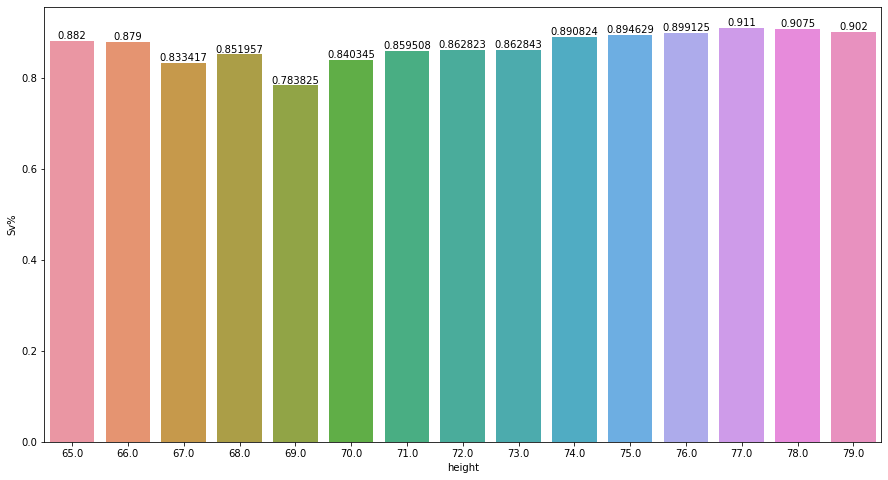

In [28]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='height', y='Sv%', data=df, ci=None)
ax.bar_label(ax.containers[0])

Interesting it looks balanced for whether a height has a better save percentage. Also, there are only a few people each at the height of 65 inches, 66 inches, 78 inches and 79 inches, so, however, what that goalie did is what the height's average is.

In [29]:
# do a one-step encoding to get a dummy column for what way a goalie catches
catch_encoded = pd.get_dummies(df['Catches'])
catch_encoded.head()

,L,R
1,1,0
6,1,0
22,1,0
33,1,0
35,1,0


In [30]:
# now glue it to the end of the dataset so we can look at that data without any bias

df = pd.concat([df, catch_encoded],axis=1) 
df.drop(columns=['Catches'], inplace=True) #drop the uneeded column
df.rename({'L':'Left','R':'Right'}, axis=1, inplace=True)
df.head()

,playerID,playerName,height,weight,birthCountry,GP,Wins,Loses,T_OL,SA,Svs,GA,Sv%,GAA,Min,SHO,ENG,Left,Right
1,abrahch01,Christer Abrahamsson,72.0,180.0,Sweden,102.0,41.0,46.0,7.0,3163.0,2821.0,342.0,0.892,3.58,5739.0,3.0,1.0,1,0
6,aebisda01,David Aebischer,73.0,185.0,Switzerland,214.0,106.0,74.0,17.0,5807.0,5294.0,513.0,0.912,2.52,12230.0,13.0,23.0,1,0
22,andercr01,Craig Anderson,74.0,180.0,USA,294.0,131.0,110.0,30.0,8808.0,8044.0,764.0,0.913,2.79,16408.0,19.0,20.0,1,0
33,archayv01,Yves Archambault,71.0,170.0,Canada,11.0,2.0,7.0,0.0,305.0,261.0,44.0,0.856,5.05,523.0,0.0,0.0,1,0
35,askeyto01,Tom Askey,73.0,195.0,USA,7.0,0.0,1.0,2.0,113.0,101.0,12.0,0.894,2.64,273.0,0.0,2.0,1,0


Start checking to see if there is any correlation between columns

<AxesSubplot:>

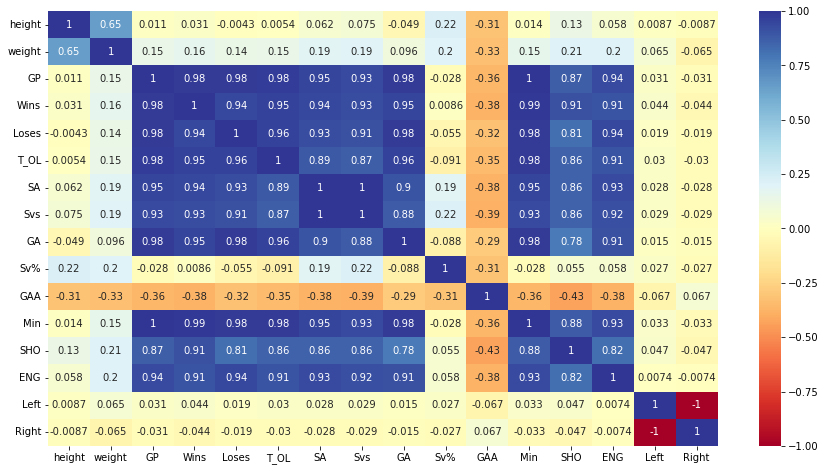

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='RdYlBu',vmin=-1.0,vmax=1.0,annot=True)

So looking at this we can see that a lot of columns are strongly correlated, so we should keep that in mind when we do the Linear Regression and just pick and choose what to look at.

Start using Linear Regression to confirm findings

In [32]:
# only interested in these columns as I only want to see if goalie's physical attributes affect their Save Percentage
regresData = df[['height', 'weight', 'Wins', 'Loses', 'Sv%', 'GAA', 'Left', 'Right']]

In [33]:
dVar = regresData['Sv%']
iVar = regresData[['height', 'weight', 'Wins', 'Loses', 'GAA', 'Left', 'Right']]
iVar['constant'] = np.ones(iVar.shape[0])

In [34]:
linReg = sm.OLS(dVar, iVar)
regResults = linReg.fit()
print(regResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sv%   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.25
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.02e-12
Time:                        18:50:26   Log-Likelihood:                 391.92
No. Observations:                 428   AIC:                            -769.8
Df Residuals:                     421   BIC:                            -741.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0034      0.003      1.237      0.2

Get rid of weight as it does not correlate to Save Percentage

In [35]:
iVar2 = iVar[['height', 'Wins', 'Loses', 'GAA', 'Left', 'Right', 'constant']]
linReg2 = sm.OLS(dVar, iVar2)
regResults2 = linReg2.fit()
print(regResults2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sv%   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     14.49
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           4.16e-13
Time:                        18:50:26   Log-Likelihood:                 391.37
No. Observations:                 428   AIC:                            -770.7
Df Residuals:                     422   BIC:                            -746.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0052      0.002      2.394      0.0

Get rid of Right as it is strongly correlated to Left and fewer goalies catch right

In [36]:
iVar2 = iVar[['height', 'Wins', 'Loses', 'GAA', 'Left', 'constant']]
linReg2 = sm.OLS(dVar, iVar2)
regResults2 = linReg2.fit()
print(regResults2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sv%   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     14.49
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           4.16e-13
Time:                        18:50:26   Log-Likelihood:                 391.37
No. Observations:                 428   AIC:                            -770.7
Df Residuals:                     422   BIC:                            -746.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0052      0.002      2.394      0.0

Now get rid of Left as it isn't correlated

In [37]:
iVar2 = iVar[['height', 'Wins', 'Loses', 'GAA', 'constant']]
linReg2 = sm.OLS(dVar, iVar2)
regResults2 = linReg2.fit()
print(regResults2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sv%   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     18.15
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           9.04e-14
Time:                        18:50:26   Log-Likelihood:                 391.37
No. Observations:                 428   AIC:                            -772.7
Df Residuals:                     423   BIC:                            -752.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0052      0.002      2.397      0.0

Check to see the distribution of Save Percentage on Height

<AxesSubplot:xlabel='height', ylabel='Sv%'>

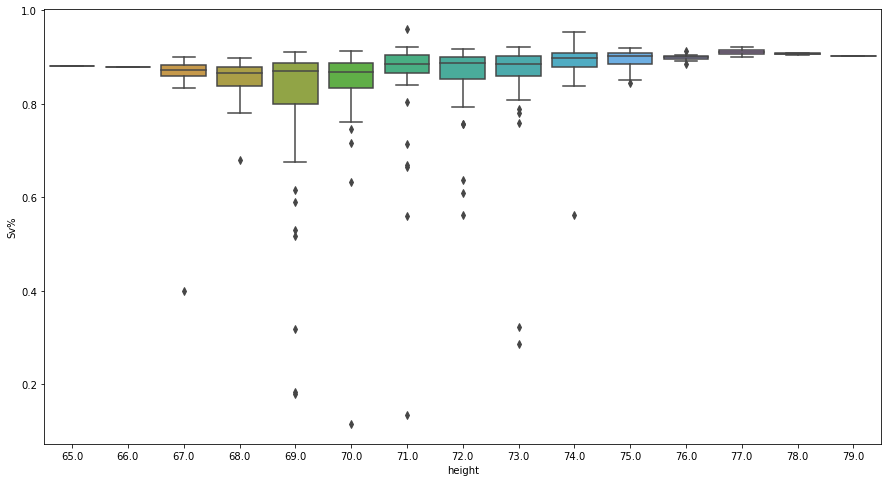

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(data=regresData, x='height', y='Sv%')

## Conclusion

So after looking at the boxplot graph it doesn’t look like there are too many outliers pulling the average save percentage down. The linear regression shows that there isn’t a strong correlation between height to save percentage with the p=value being 0.017 which I would remove next. The bar graph doesn’t show an advantage that a taller goalie would have with stopping the puck. So I say that solely looking at height to make a better goalie isn’t the way you would want to find a good goalie.